In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('heat_transfer_multilayer_dataset.csv')

In [40]:
material_columns = ['Mat1', 'Mat2', 'Mat3', 'Mat4', 'Mat5']
label_encoders = {}
for col in material_columns:
    df[col] = df[col].fillna('None')
    le = LabelEncoder()
    df[f'{col}_enc'] = le.fit_transform(df[col])
    label_encoders[col] = le

In [41]:
feature_columns = ['delta_T', 'L1', 'k1', 'L2', 'k2', 'L3', 'k3', 'L4', 'k4', 'L5', 'k5'] + [f'{col}_enc' for col in material_columns]
for col in feature_columns:
    df[col] = df[col].fillna(0)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[feature_columns] = scaler.fit_transform(df[feature_columns])


In [42]:
X = df_scaled[feature_columns]
y = df_scaled['Q']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 800 samples
Testing set: 200 samples


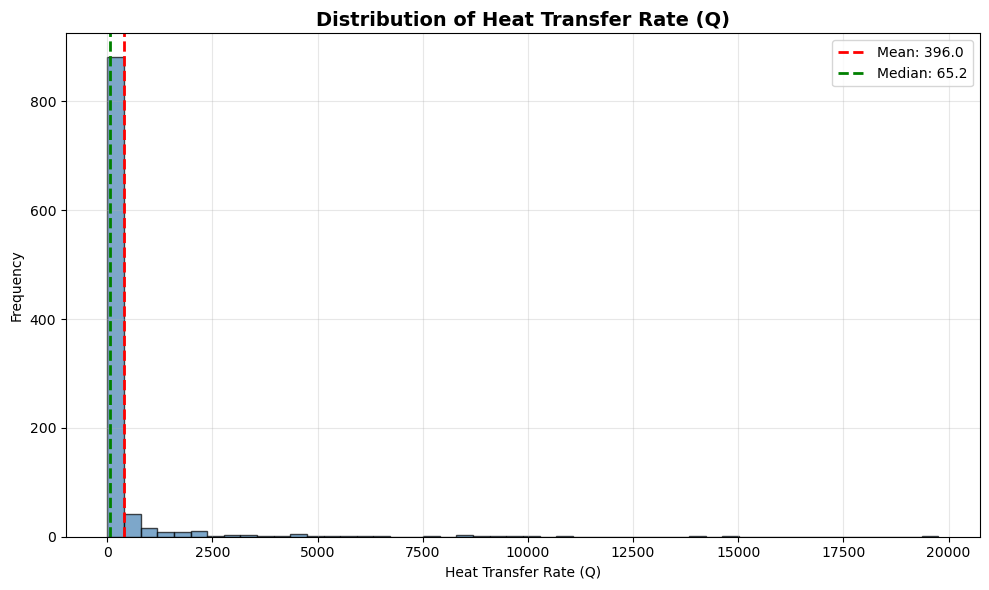

In [43]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.hist(df['Q'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_title('Distribution of Heat Transfer Rate (Q)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Heat Transfer Rate (Q)')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)
q_mean = df['Q'].mean()
q_median = df['Q'].median()
ax1.axvline(q_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {q_mean:.1f}')
ax1.axvline(q_median, color='green', linestyle='--', linewidth=2, label=f'Median: {q_median:.1f}')
ax1.legend()
plt.tight_layout()
plt.show()



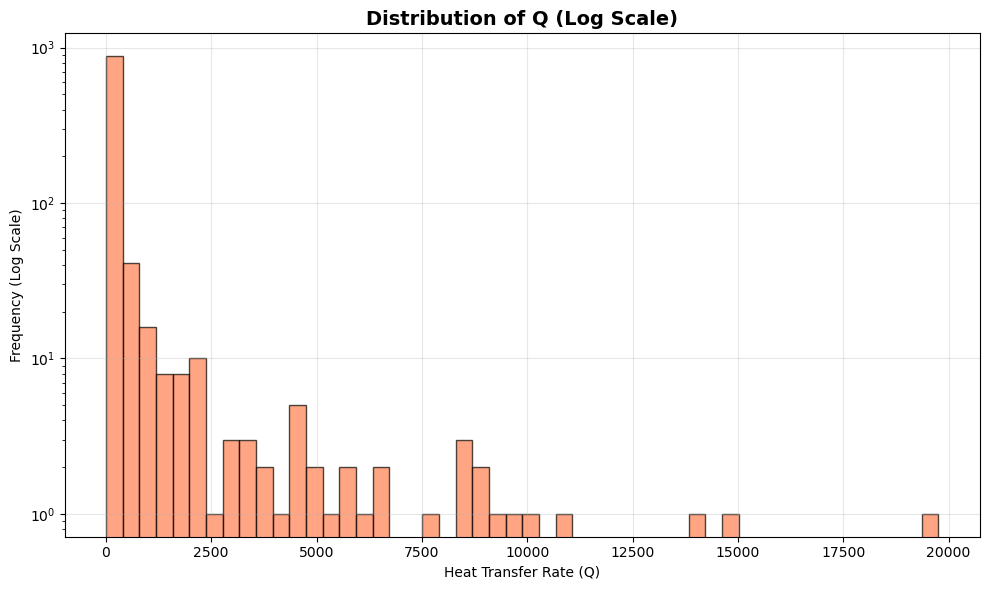

In [44]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.hist(df['Q'], bins=50, edgecolor='black', alpha=0.7, color='coral')
ax2.set_yscale('log')
ax2.set_title('Distribution of Q (Log Scale)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Heat Transfer Rate (Q)')
ax2.set_ylabel('Frequency (Log Scale)')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


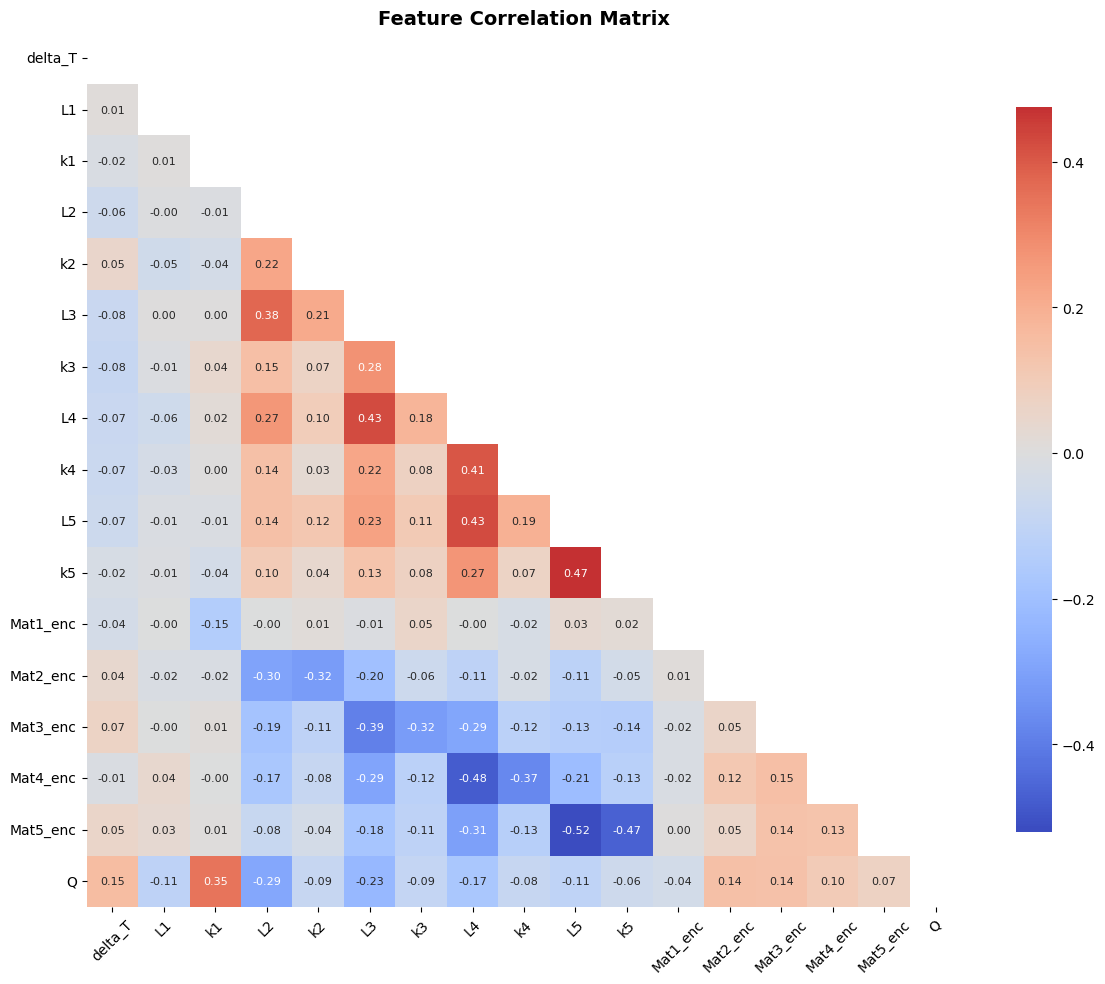

In [45]:
fig3, ax3 = plt.subplots(figsize=(12, 10))
correlation_data = df_scaled[feature_columns + ['Q']].corr()
mask = np.triu(np.ones_like(correlation_data, dtype=bool))  
sns.heatmap(correlation_data, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            ax=ax3,
            cbar_kws={"shrink": .8},
            annot_kws={'size': 8})
ax3.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()

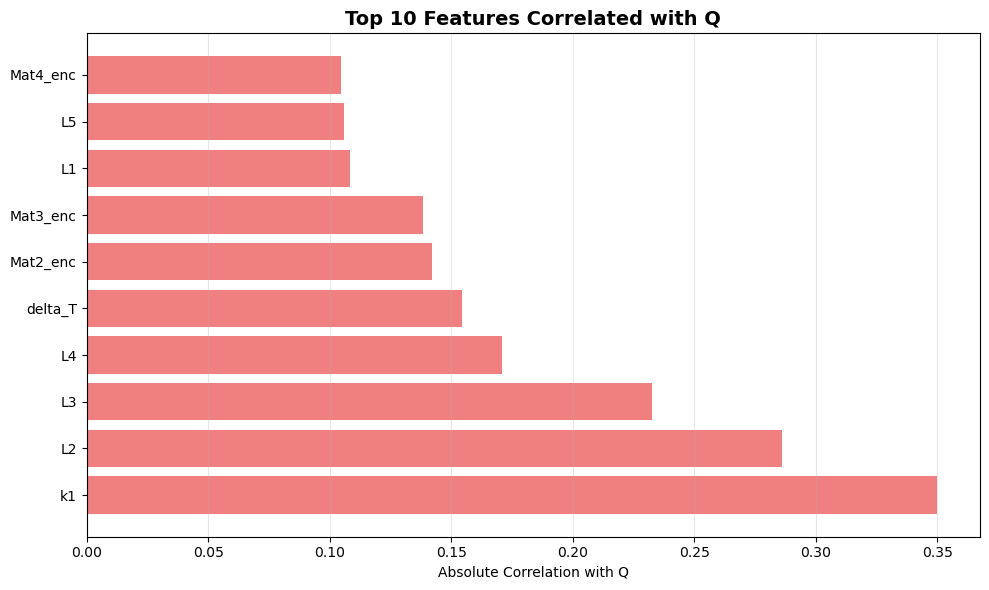

In [46]:
fig4, ax4 = plt.subplots(figsize=(10, 6))
q_correlations = correlation_data['Q'].abs().sort_values(ascending=False)[1:]  
top_features = q_correlations.head(10)
ax4.barh(range(len(top_features)), top_features.values, color='lightcoral')
ax4.set_yticks(range(len(top_features)))
ax4.set_yticklabels(top_features.index)
ax4.set_xlabel('Absolute Correlation with Q')
ax4.set_title('Top 10 Features Correlated with Q', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [47]:
print(f"\nDataset Summary:")
print(f"Total samples: {len(df):,}")
print(f"Features: {len(feature_columns)}")
print(f"\nQ Statistics:")
print(f"Min: {df['Q'].min():.2f}")
print(f"Max: {df['Q'].max():.2f}")
print(f"Mean: {df['Q'].mean():.2f}")
print(f"Median: {df['Q'].median():.2f}")
print(f"Std: {df['Q'].std():.2f}")
print(f"Skewness: {df['Q'].skew():.2f}")

print(f"\nTop 5 features most correlated with Q:")
for feature, corr in q_correlations.head(5).items():
    print(f"{feature}: {corr:.3f}")


Dataset Summary:
Total samples: 1,000
Features: 16

Q Statistics:
Min: 7.47
Max: 19758.04
Mean: 395.98
Median: 65.15
Std: 1445.47
Skewness: 7.14

Top 5 features most correlated with Q:
k1: 0.350
L2: 0.286
L3: 0.233
L4: 0.171
delta_T: 0.154


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xgb


In [49]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, verbosity=0),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

In [50]:
trained_models = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    trained_models[name] = model
    predictions[name] = {
        'train_pred': y_pred_train,
        'test_pred': y_pred_test
    }
    

In [51]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv('heat_transfer_multilayer_dataset.csv')
target = "Q"
features = None
TEST_SIZE = 0.2
RANDOM_STATE = 42
save_pred_csv = True

df = pd.read_csv('heat_transfer_multilayer_dataset.csv')
print("Data Shape: ", df.shape)
print("Columns: ", df.columns.tolist())

if target not in df.columns:
  raise ValueError(f"Target columns '{target}' is not found in the dataset.")


if features is None:
  numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
  feature_columns = [c for c in numeric_columns if c != target]
  print("Auto Selected numeric feature columns:", feature_columns)

else:
  feature_columns = features
  missing = [c for c in feature_columns if c != target]
  if missing:
    raise ValueError(f"Missing feature columns: {missing}")

X = df[feature_columns].copy()
y = df[target].copy()

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=TEST_SIZE, random_state=RANDOM_STATE)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models ={
    "Linear Regression": LinearRegression(), # Changed from LogisticRegression
    "Decision Tree": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=RANDOM_STATE, verbosity=0),
    "Neural Network (MLP)": MLPRegressor(random_state=RANDOM_STATE, max_iter=500)}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({"model": name, "MSE": mse, "MAE": mae, "R²": r2, "RMSE": rmse})
    print(f"{name} -> MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, RMSE: {rmse:.4f}")


results_df=pd.DataFrame(results).set_index("model")
print("\n---Summary---")
print(results_df.sort_values("RMSE"))

results_df.to_csv("models_performance_summary.csv")
print("\nSaved Performance Summary to models_performance_summary.csv")

Data Shape:  (1000, 17)
Columns:  ['delta_T', 'Mat1', 'L1', 'k1', 'Mat2', 'L2', 'k2', 'Mat3', 'L3', 'k3', 'Mat4', 'L4', 'k4', 'Mat5', 'L5', 'k5', 'Q']
Auto Selected numeric feature columns: ['delta_T', 'L1', 'k1', 'L2', 'k2', 'L3', 'k3', 'L4', 'k4', 'L5', 'k5']
Linear Regression -> MSE: 1227420.8949, MAE: 562.1715, R²: 0.1963, RMSE: 1107.8903
Decision Tree -> MSE: 465909.5189, MAE: 163.1172, R²: 0.6949, RMSE: 682.5757
Random Forest -> MSE: 259879.1074, MAE: 142.2110, R²: 0.8298, RMSE: 509.7834
XGBoost -> MSE: 232190.4839, MAE: 124.1431, R²: 0.8480, RMSE: 481.8615
Neural Network (MLP) -> MSE: 1167751.7062, MAE: 480.0311, R²: 0.2354, RMSE: 1080.6256

---Summary---
                               MSE         MAE        R²         RMSE
model                                                                
XGBoost               2.321905e+05  124.143094  0.847969   481.861478
Random Forest         2.598791e+05  142.211007  0.829839   509.783393
Decision Tree         4.659095e+05  163.117250  0

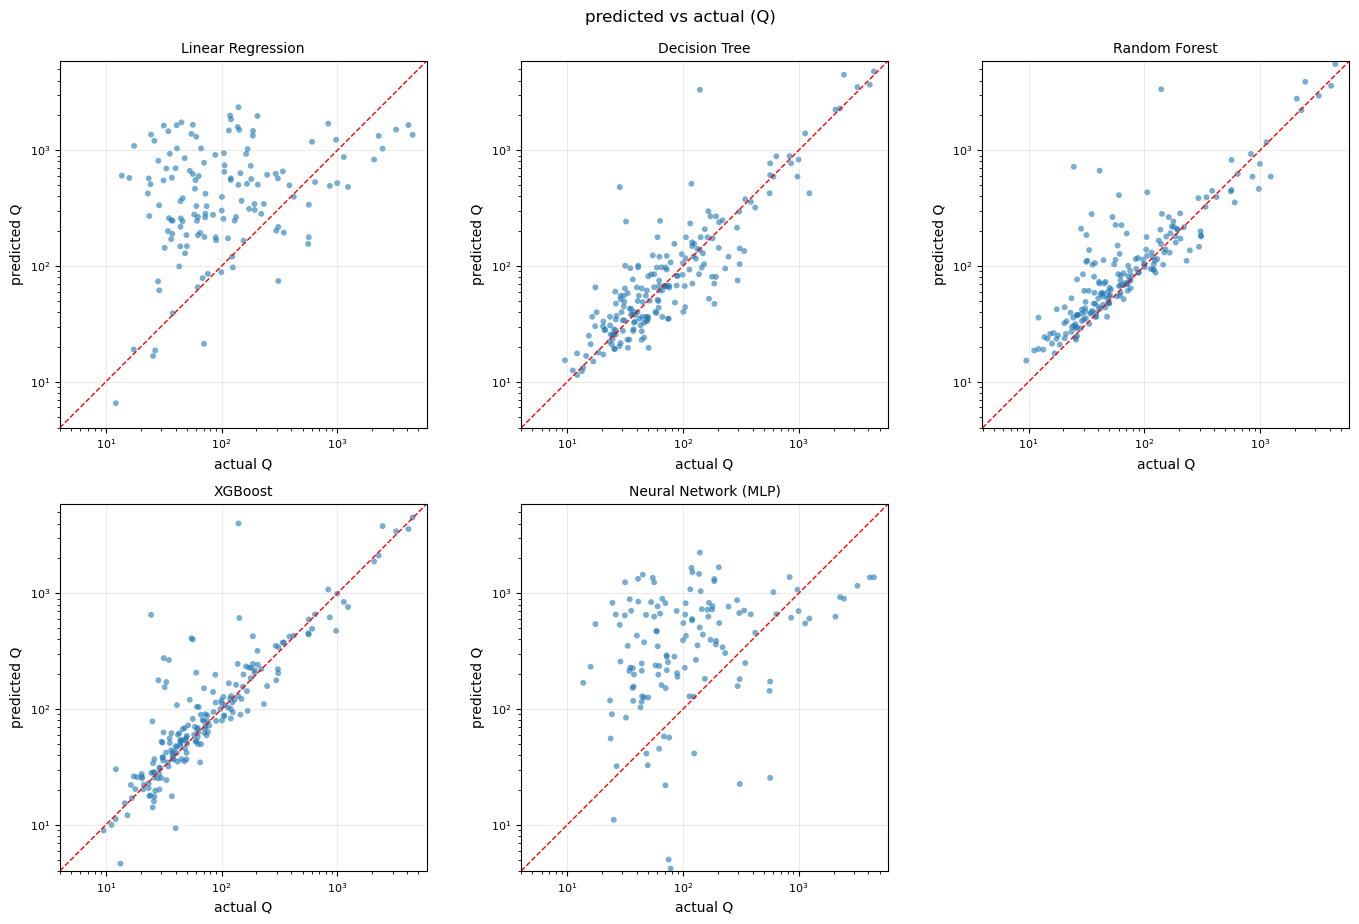

In [52]:
preds={}
for name,model in models.items():
    try:
        preds[name]=model.predict(X_test)
    except Exception as e:
        print(f'skipping {name}: {e}')

items=list(preds.items())
n=min(len(items),5)

# y_true for plotting
y_true = y_test.values if hasattr(y_test,'values') else y_test
all_preds=np.concatenate([p for _,p in items])
y_all=np.concatenate([y_true,all_preds])
y_pos=y_all[y_all>0]
if y_pos.size==0:
    raise ValueError("no positive values for log scale; disable log or filter data.")
lo,hi=np.percentile(y_pos,[1,99])
lo=max(lo,1e-12)  
hi=max(hi,lo*10)  
def style(ax):
    ax.tick_params(axis='both',labelsize=8)
    ax.title.set_fontsize(10)
def clean_grid(fig,axes,n):
    for j in range(n,6):
        try: axes[j].remove()
        except: pass
    fig.tight_layout(pad=1.0)
n=min(len(items),5)
fig,axes=plt.subplots(2,3,figsize=(14,9)); axes=axes.ravel()
for i,(name,y_pred) in enumerate(items[:n]):
    ax=axes[i]
    m=(y_true>0)&(y_pred>0)
    yt=y_true[m]; yp=y_pred[m]
    if yt.size==0:
        ax.set_title(f'{name} (no positive data for log)'); style(ax); continue
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.scatter(yt,yp,alpha=0.6,s=18,edgecolor='none')
    ax.plot([lo,hi],[lo,hi],color='r',linestyle='--',linewidth=1)
    ax.set_aspect('equal',adjustable='box')
    ax.set(xlabel='actual Q',ylabel='predicted Q',xlim=(lo,hi),ylim=(lo,hi))
    ax.grid(True,alpha=0.25,linewidth=0.7)
    ax.set_title(name); style(ax)
clean_grid(fig,axes,n)
plt.suptitle('predicted vs actual (Q)',fontsize=12,y=1.02)
plt.show()

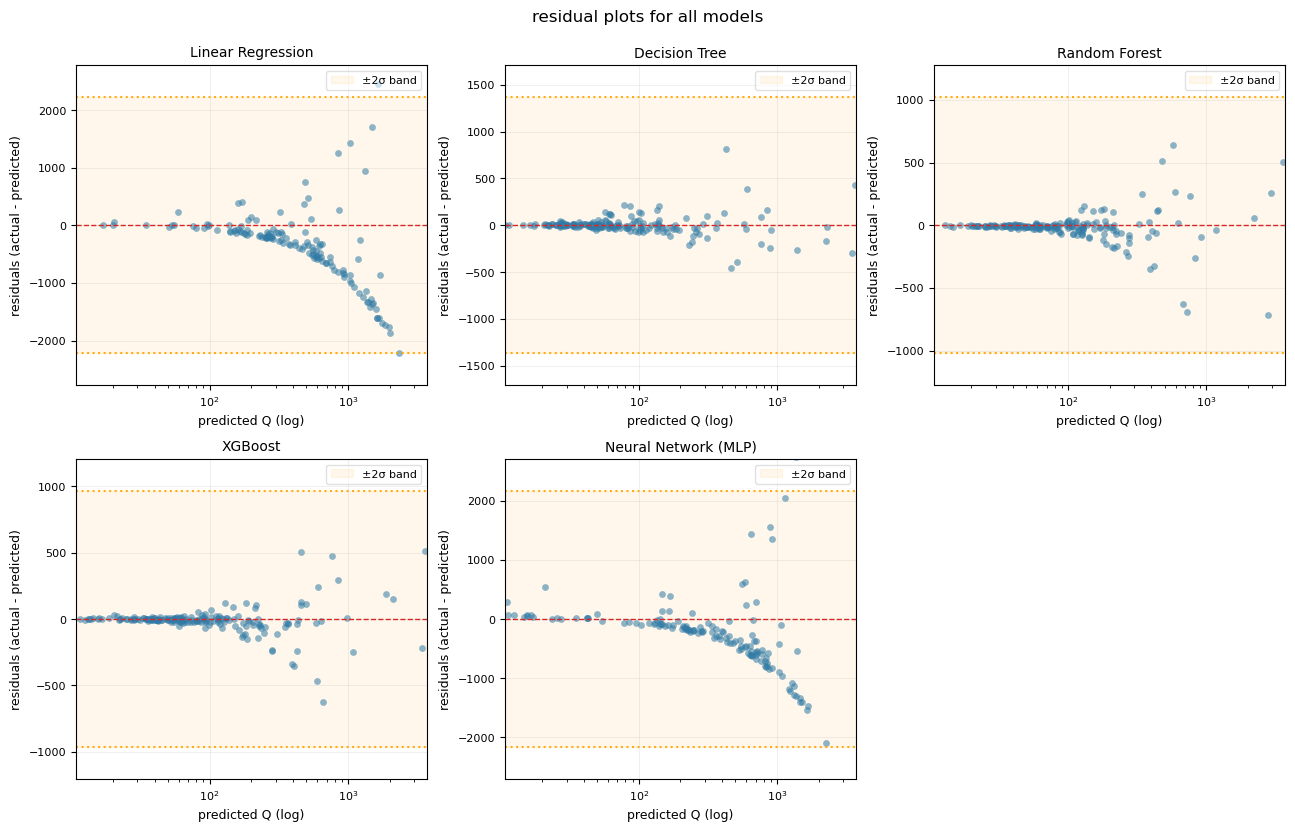

In [53]:
use_log_x=True 
marker_kw=dict(s=24,alpha=0.55,linewidths=0,marker='o')
all_preds=np.concatenate([p for _,p in items[:n]])
if use_log_x:
    pos=all_preds[all_preds>0]
    xlo,xhi=np.percentile(pos,[2,98])
    xlo=max(xlo,1e-12); xhi=max(xhi,xlo*10)
else:
    xlo,xhi=np.percentile(all_preds,[1,99])
fig,axes=plt.subplots(2,3,figsize=(13,8)); axes=axes.ravel()
for i,(name,y_pred) in enumerate(items[:n]):
    ax=axes[i]
    res=y_true - y_pred
    rs=np.std(res,ddof=1)
    if use_log_x:
        m=y_pred>0
        xp, rp = y_pred[m], res[m]
        ax.set_xscale('log')
    else:
        xp, rp = y_pred, res
    r98=np.percentile(np.abs(rp),98)
    rlim=min(max(r98,1e-9),2.5*rs)
    jx=(np.random.rand(xp.size)-0.5)*0.01*(xhi-xlo)
    ax.scatter(xp+jx, rp, **marker_kw)
    ax.axhline(0,color='#d62728',linestyle='--',linewidth=1)
    ax.axhspan(-2*rs,2*rs,color='orange',alpha=0.08,label='±2σ band')
    ax.axhline(2*rs,color='orange',linestyle=':',alpha=0.9)
    ax.axhline(-2*rs,color='orange',linestyle=':',alpha=0.9)
    ax.set_xlim(xlo,xhi); ax.set_ylim(-rlim,rlim)
    ax.grid(True,alpha=0.2,linewidth=0.7)
    ax.set_xlabel('predicted Q'+(' (log)' if use_log_x else ''),fontsize=9)
    ax.set_ylabel('residuals (actual - predicted)',fontsize=9)
    ax.set_title(name,fontsize=10)
    ax.tick_params(labelsize=8)
    ax.legend(fontsize=8,loc='upper right',framealpha=0.6)
for j in range(n,6):
    try: axes[j].remove()
    except: pass
plt.tight_layout(pad=0.9)
plt.suptitle('residual plots for all models',fontsize=12,y=1.03)
plt.show()

In [54]:
def prompt_numeric(msg):
    while True:
        s=input(msg).strip()
        try:
            return float(s)
        except ValueError:
            print("enter a numeric value")
def collect_user_features(feature_columns):
    print("enter values for each feature (press Enter to use NaN if unsure):")
    vals={}
    for f in feature_columns:
        s=input(f"{f}: ").strip()
        if s=="":
            vals[f]=np.nan
        else:
            try:
                vals[f]=float(s)
            except ValueError:
                print("not numeric, try again")
                vals[f]=prompt_numeric(f"{f}: ")
    return vals
def predict_q_xgb_interactive():
    print("required features:")
    print(feature_columns)
    user_vals=collect_user_features(feature_columns)
    x=pd.DataFrame([[user_vals[f] for f in feature_columns]], columns=feature_columns)
    x=x.fillna(x.mean(numeric_only=True))
    x_scaled=scaler.transform(x)
    xgb=models.get('XGBoost', None)
    if xgb is None:
        raise RuntimeError("XGBoost model not found in 'models'. fit models first.")
    q_pred=float(xgb.predict(x_scaled)[0])
    return q_pred, user_vals

In [ ]:

 


q_hat, inputs_given = predict_q_xgb_interactive()
print("\ninputs used:", inputs_given)
print("predicted Q:", q_hat)


required features:
['delta_T', 'L1', 'k1', 'L2', 'k2', 'L3', 'k3', 'L4', 'k4', 'L5', 'k5']
enter values for each feature (press Enter to use NaN if unsure):
